<a href="https://colab.research.google.com/github/Seren-Smith/hello-github-actions/blob/main/March_Challenge_Stock_Market_Day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get some data!!
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2013-01-01', end = '2021-03-03')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.039789
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.824715
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.356062
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.259851
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.303608
...,...,...,...,...,...,...
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998
2021-02-26,124.849998,121.199997,122.589996,121.260002,164320000.0,121.260002
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001


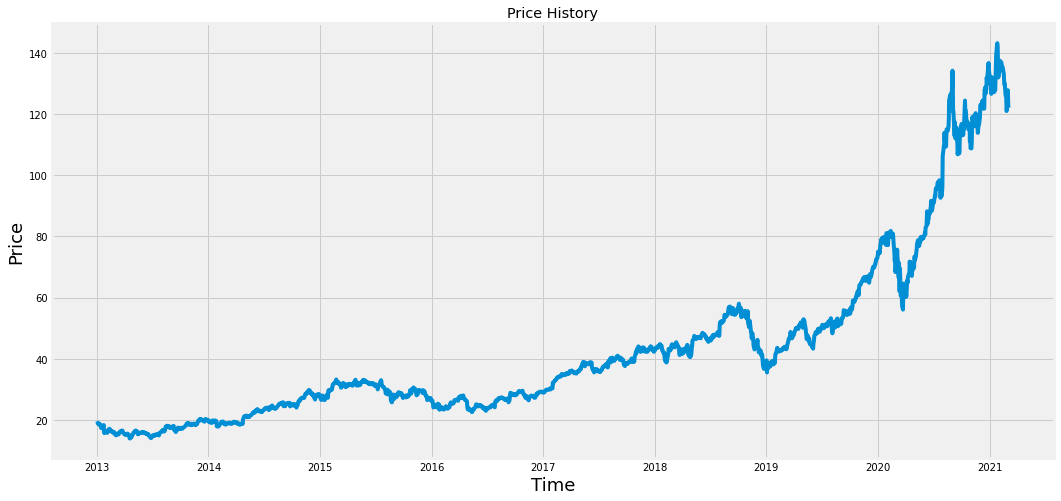

In [ ]:
plt.figure(figsize=(16, 8))
plt.title("Price History")
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Price", fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [ ]:
# Filter to just the close column
data = df.filter(['Close'])
# Convert data to numpy array
dataset = data.values
training_len = math.ceil(len(dataset) * 0.8)

# Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04380933],
       [0.04189388],
       [0.03772025],
       ...,
       [0.88104864],
       [0.86038502],
       [0.83670306]])

In [ ]:
# Create Training Data
train_data = scaled_data[0:training_len, :]

x_train = []
y_train = []

for i in range(60, training_len):
  x_train.append(train_data[i - 60:i, 0]) # Get the data in the past 60 days for each iteration
  y_train.append(train_data[i, 0]) # Get the data of that day

  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.04380933, 0.04189388, 0.03772025, 0.03686341, 0.03725313,
       0.0349839 , 0.03675563, 0.03586838, 0.03074117, 0.02636576,
       0.03194073, 0.03099821, 0.03025747, 0.03157589, 0.03412982,
       0.01657569, 0.01364032, 0.0163905 , 0.0187233 , 0.01832529,
       0.01795492, 0.01743805, 0.01431474, 0.01860446, 0.01846902,
       0.02147349, 0.02334195, 0.02471012, 0.02138504, 0.02113904,
       0.02102296, 0.01924571, 0.01919871, 0.01611963, 0.01534846,
       0.01666137, 0.01444741, 0.01615279, 0.01493663, 0.01406045,
       0.0110394 , 0.00815932, 0.01122458, 0.00970992, 0.0110698 ,
       0.0113849 , 0.01308475, 0.01047554, 0.01045343, 0.0116005 ,
       0.01468511, 0.01801849, 0.01767853, 0.01701239, 0.01719205,
       0.01972941, 0.02019099, 0.01951658, 0.01701239, 0.01440871])]
[0.010608216319641275]



In [ ]:
# Convert NumPy
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape our Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build our LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))

# Densely Connected NN
model.add(Dense(30))
model.add(Dense(1))

In [ ]:
# Compile our Model
model.compile(optimizer = "rmsprop", loss = "mean_squared_error")

model.fit(x_train, y_train, batch_size = 1)

1585/1585 [==============================] - 38s 22ms/step - loss: 7.9952e-04


In [ ]:
test_data = scaled_data[training_len - 60:, :]

x_test = []
y_test = dataset[training_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, :])

# Reshape and convert to NumPy
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get Predictions
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [ ]:
# See total error in predictions
rmse = np.sqrt(np.mean((pred - y_test) ** 2))
rmse

4.991234005513446

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


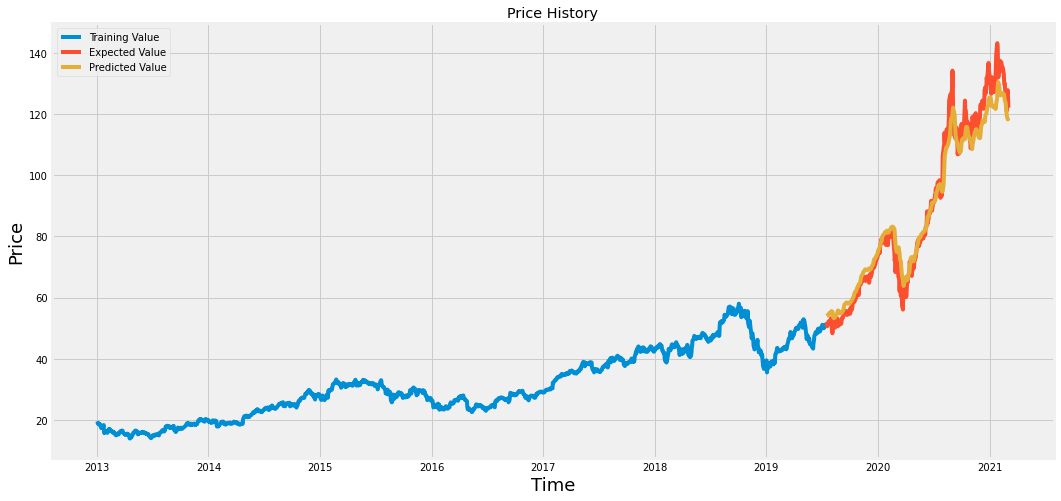

In [ ]:
# Set up some plot data
train = data[:training_len]
expected = data[training_len:]
expected['Predictions'] = pred

# Visualize outputs
plt.figure(figsize=(16,8))
plt.title("Price History")
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Price", fontsize = 18)
plt.plot(train['Close'])
plt.plot(expected[['Close', 'Predictions']])
plt.legend(["Training Value", "Expected Value", "Predicted Value"])
plt.show()

In [ ]:
expected

,Close,Predictions
Date,,
2019-07-17,50.837502,54.017281
2019-07-18,51.415001,54.086628
2019-07-19,50.647499,54.205372
2019-07-22,51.805000,54.203888
2019-07-23,52.209999,54.335365
...,...,...
2021-02-25,120.989998,120.653427
2021-02-26,121.260002,119.376694
2021-03-01,127.790001,118.245010


In [ ]:
quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2013-01-01', end = '2021-03-03')
new_df = quote.filter(['Close'])

# Last 60 days of data
last_60 = new_df[-60:]

# Scale Data
last_60_scaled = scaler.fit_transform(last_60)

# Test data
x_last_60 = []
x_last_60.append(last_60_scaled)

# Convert and reshape
x_last_60 = np.array(x_last_60)
x_last_60 = np.reshape(x_last_60, (x_last_60.shape[0], x_last_60.shape[1], 1))

prediction_price = model.predict(x_last_60)
prediction_price = scaler.inverse_transform(prediction_price)

prediction_price

array([[125.266426]], dtype=float32)